### Data Cleanning

In [249]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("white")

import time
import timeit

import scipy.stats 
import pandas as pd
import pymc as pm

In [250]:
# This function is to conver the string into int
def Str2float(string):
    try:
        return float(string)
    except:
        return "NaN"

In [251]:
#import 2011
game11_df = pd.read_csv('10-11game_stats.csv')[["Visitor/Neutral", "PTS", "Home/Neutral", "PTS.1"]]
game11_df['Year'] = 2011
game11_df['PTS'] = game11_df['PTS'].map(lambda x: Str2float(x))
game11_df['PTS'] = game11_df['PTS.1'].map(lambda x: Str2float(x))
game11_df = game11_df[game11_df['PTS'].map(lambda x: type(x) is float)]

In [213]:
#import name and their teams 
playerTeam_df = pd.read_csv('salary.csv', header = 1)[['Player','Tm']]
playerTeam_df = playerTeam_df[playerTeam_df['Tm'] != 'Tm']
playerTeam_df = playerTeam_df[playerTeam_df['Player'] != 'Player']
playerTeam_df = playerTeam_df[~pd.isnull(playerTeam_df['Player'])]

In [214]:
#import 2012
game12_df = pd.read_csv('11-12game_stats.csv')[["Visitor/Neutral", "PTS", "Home/Neutral", "PTS.1"]]
game12_df['Year'] = 2012
game12_df['PTS'] = game12_df['PTS'].map(lambda x: Str2float(x))
game12_df['PTS'] = game12_df['PTS.1'].map(lambda x: Str2float(x))
game12_df = game12_df[game12_df['PTS'].map(lambda x: type(x) is float)]

In [215]:
#import 2013
game13_df = pd.read_csv('12-13game_stats.csv')[["Visitor/Neutral", "PTS", "Home/Neutral", "PTS.1"]]
game13_df['Year'] = 2013
game13_df['PTS'] = game13_df['PTS'].map(lambda x: Str2float(x))
game13_df['PTS'] = game13_df['PTS.1'].map(lambda x: Str2float(x))
game13_df = game13_df[game13_df['PTS'].map(lambda x: type(x) is float)]

In [216]:
#import 2014
game14_df = pd.read_csv('13-14game_stats.csv')[["Visitor/Neutral", "PTS", "Home/Neutral", "PTS.1"]]
game14_df['Year'] = 2014
game14_df['PTS'] = game14_df['PTS'].map(lambda x: Str2float(x))
game14_df['PTS'] = game14_df['PTS.1'].map(lambda x: Str2float(x))
game14_df = game14_df[game14_df['PTS'].map(lambda x: type(x) is float)]

In [217]:
#import 2015
game15_df = pd.read_csv('14-15game_stats.csv')[["Visitor/Neutral", "PTS", "Home/Neutral", "PTS.1"]]
game15_df['Year'] = 2015
game15_df['PTS'] = game15_df['PTS'].map(lambda x: Str2float(x))
game15_df['PTS'] = game15_df['PTS.1'].map(lambda x: Str2float(x))
game15_df = game15_df[game15_df['PTS'].map(lambda x: type(x) is float)]

In [219]:
game_all_df=pd.concat([game11_df,game12_df,game13_df,game14_df,game15_df])

In [220]:
Team_names=game_all_df['Visitor/Neutral'].drop_duplicates()
Team_names=list(Team_names)
Team_names[7]

'Atlanta Hawks'

In [231]:
Team_Score = np.zeros(33)
for i in range(33):
    Full_Score=np.append( np.array(Visitor_Score.get_group(Team_names[i])['PTS']), np.array(Home_Score.get_group(Team_names[i])['PTS']) )
    print Team_names[i], np.mean(Full_Score)

Miami Heat 99.0913705584
Houston Rockets 104.850253807
Phoenix Suns 103.225888325
Boston Celtics 97.9567430025
Charlotte Bobcats 97.7435897436
Utah Jazz 100.14213198
Portland Trail Blazers 101.573604061
Atlanta Hawks 98.6852791878
Sacramento Kings 103.822335025
Detroit Pistons 99.6446700508
Milwaukee Bucks 98.269035533
Chicago Bulls 95.4695431472
Indiana Pacers 98.1857506361
New York Knicks 100.47715736
Washington Wizards 99.9568527919
Memphis Grizzlies 96.8045685279
Oklahoma City Thunder 103.814720812
Los Angeles Clippers 102.279187817
Orlando Magic 98.4060913706
Denver Nuggets 106.053299492
Los Angeles Lakers 102.565989848
Cleveland Cavaliers 100.558375635
Philadelphia 76ers 98.6725888325
Minnesota Timberwolves 102.939086294
New Orleans Hornets 95.1
Dallas Mavericks 101.763959391
Golden State Warriors 104.126903553
San Antonio Spurs 102.187817259
Toronto Raptors 100.42893401
New Jersey Nets 97.4594594595
Brooklyn Nets 99.0975609756
New Orleans Pelicans 101.81097561
Charlotte Hornets 

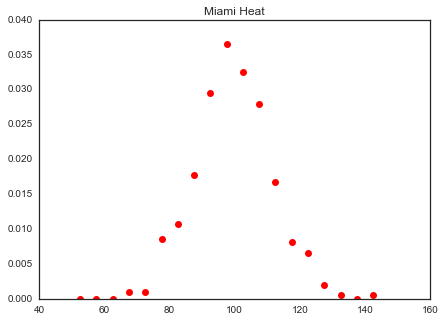

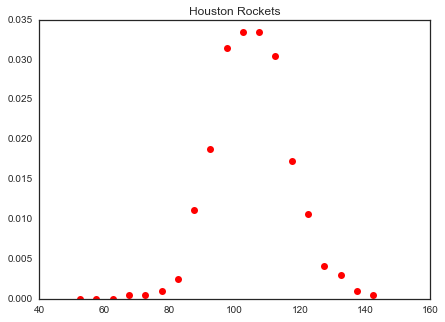

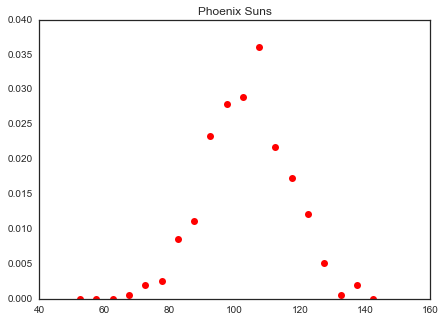

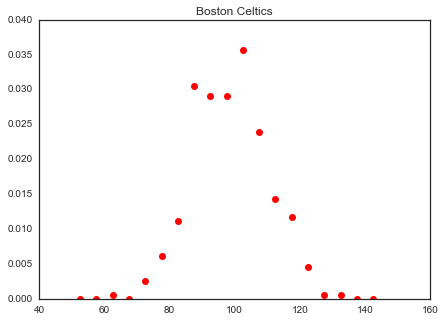

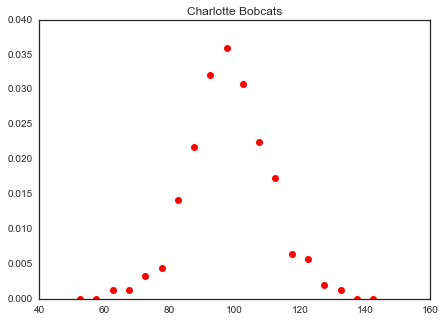

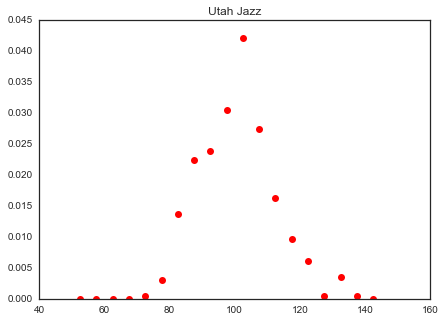

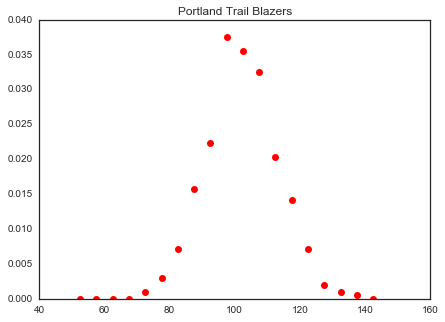

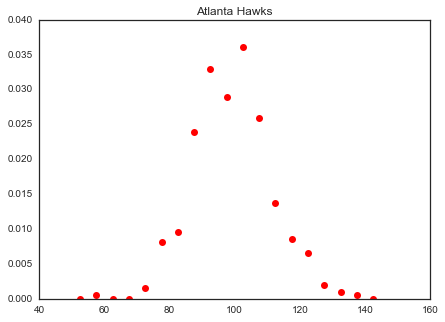

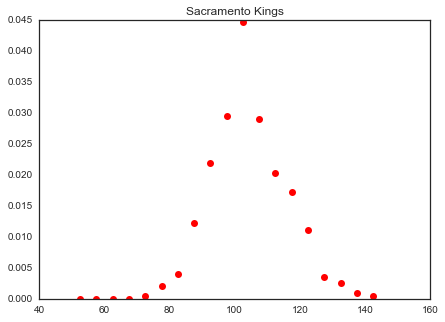

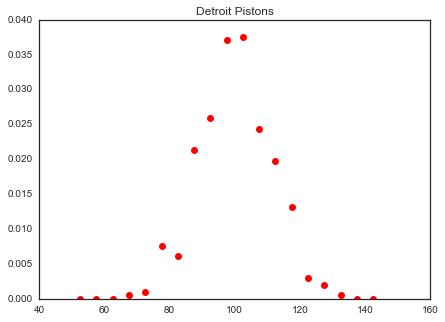

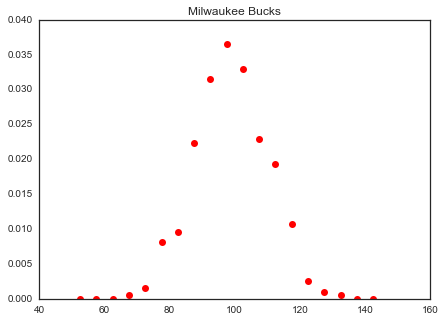

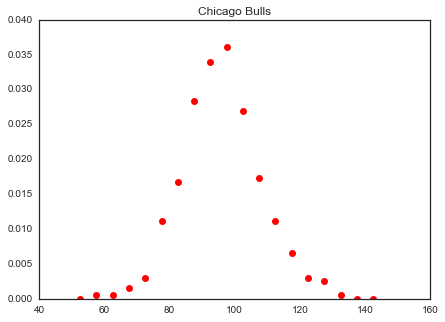

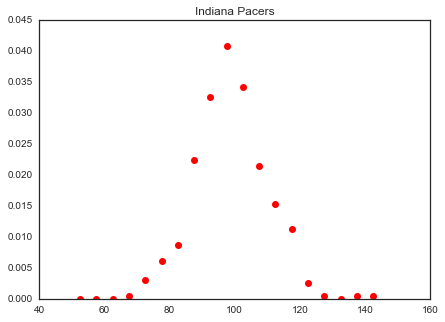

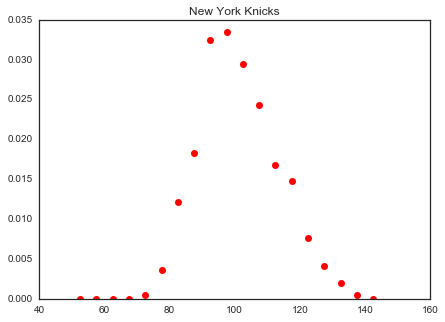

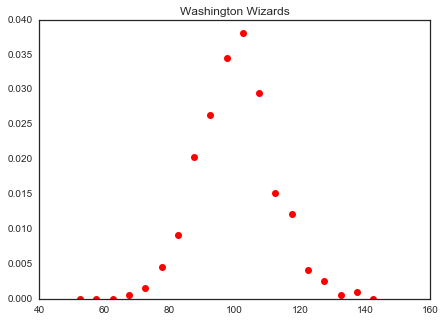

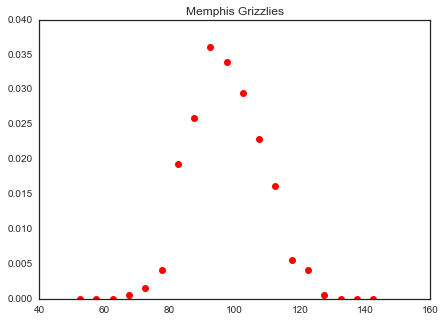

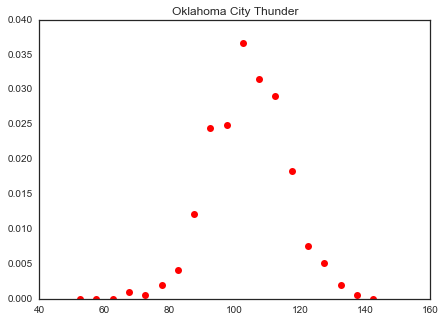

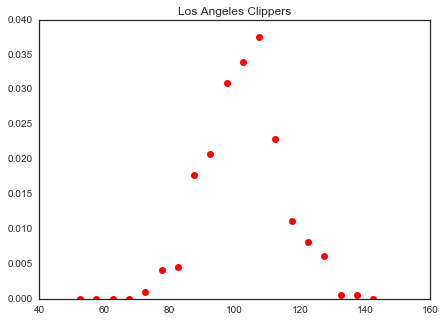

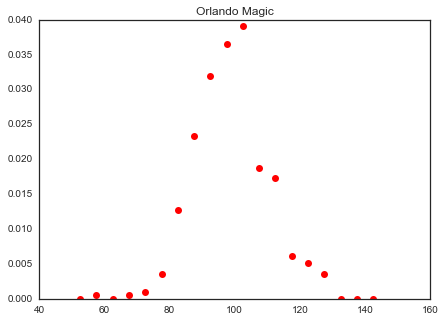

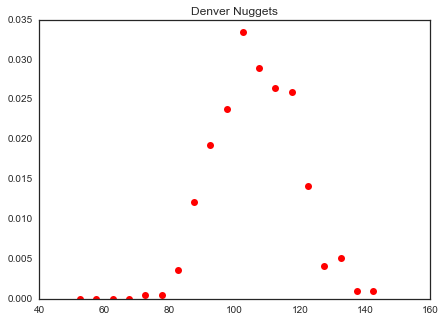

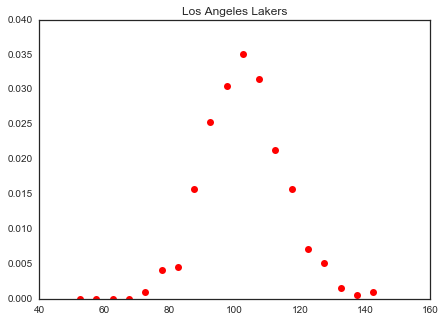

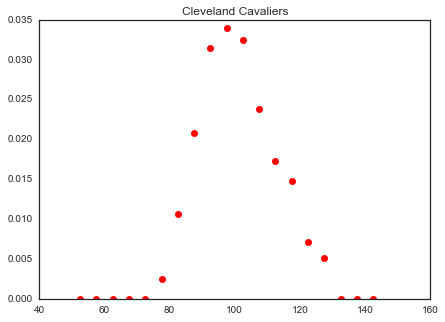

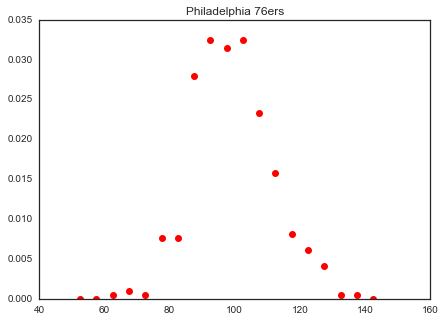

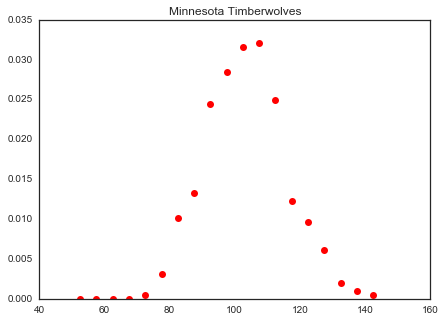

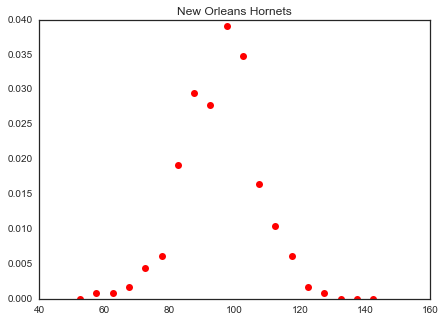

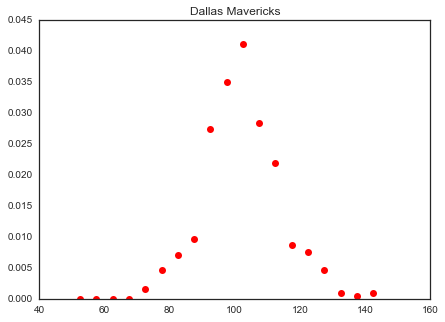

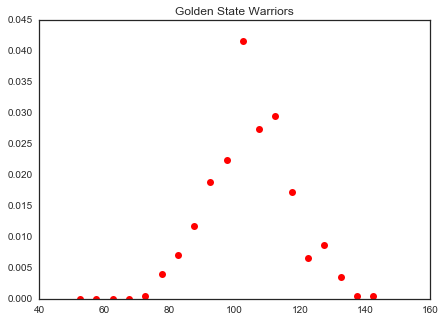

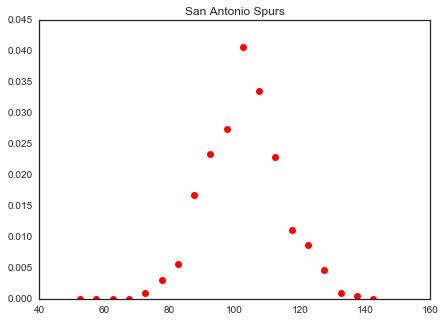

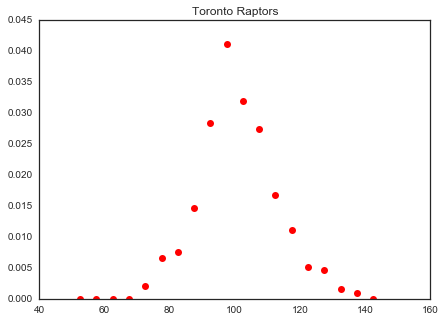

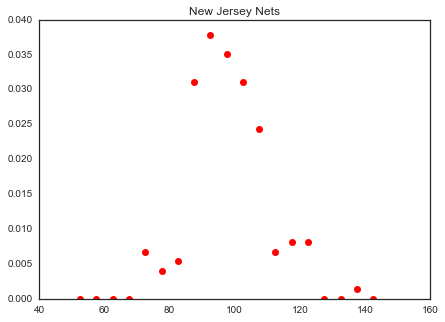

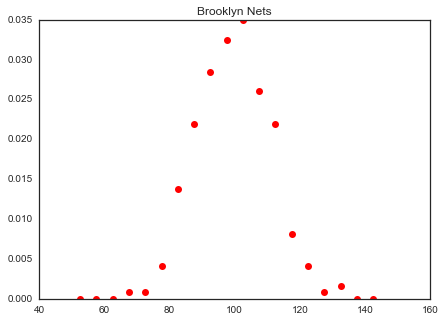

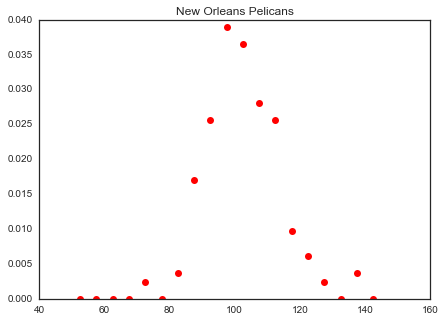

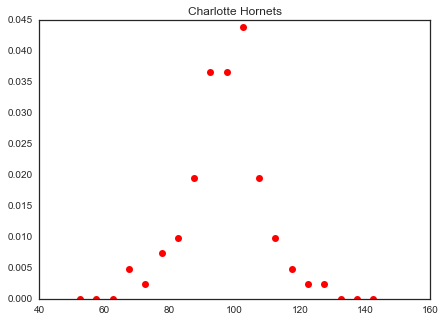

In [232]:
Visitor_Score=game_all_df.groupby(['Visitor/Neutral'])
Home_Score=game_all_df.groupby(['Home/Neutral'])
for i in range(len(Team_names)):
    plt.figure(figsize=(7, 5)) 
    a=np.histogram(np.append( np.array(Visitor_Score.get_group(Team_names[i])['PTS']), np.array(Home_Score.get_group(Team_names[i])['PTS']) ),bins=np.arange(50,150,5),normed=True)
    plt.plot(np.arange(52.5,147.5,5),a[0],'ro')
    plt.title(Team_names[i])

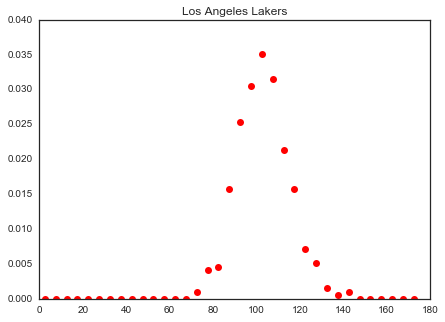

In [252]:
Visitor_Score=game_all_df.groupby(['Visitor/Neutral'])
Home_Score=game_all_df.groupby(['Home/Neutral'])
plt.figure(figsize=(7, 5)) 
team=20
AllScore=np.append( np.array(Visitor_Score.get_group(Team_names[team])['PTS']), np.array(Home_Score.get_group(Team_names[team])['PTS'])) 
a=np.histogram( AllScore ,bins=np.arange(0,180,5),normed=True)
plt.plot(np.arange(2.5,177.5,5),a[0],'ro')
plt.title(Team_names[team])

## b). Derive and compute the maximum likelihood solution for a Gaussian.
First, we take frequentist view. We look for single value of parameter which maximizes likelihood function given the set of data and Poisson distribution.
$$N(X=k;\lambda)=\frac{1}{\sqrt{ 2 \pi \sigma^2} } e^{-\frac{(x-\mu)^2}{2 \sigma^2}} $$

given data sets $D=\{d_0,d_1,...d_N\}$  log-likelihood function is obtained by 
$$\ln L(\lambda : d_1,d_2,...d_N)=\sum_{i=1}^{N} \ln \frac{\lambda^{d_i}e^{-\lambda}}{d_i!} =\sum_{i=1}^{N}(d_i\ln\lambda-\lambda-\ln d_i!) = (\sum_{i=1}^{N}d_i)\ln\lambda-N\lambda-\sum_{i=1}^{N}ln d_i !$$

We maximize $\ln L(\lambda)$ with respect to $\lambda$, given data sets 'hangout_chat_data.csv'.

$$ \frac{\partial \ln L}{\partial \lambda} = 0 = \frac{\sum_{i=1}^{N} d_i}{\lambda} - N$$

$$\lambda = \frac{\sum_{i=1}^{N}d_i}{N}$$

which is equal to mean of the data.

In [206]:
data=pd.DataFrame(map(int, AllScore))

## c). Bayesian solution with Metropolis Hastings
* Compare this to the Bayesian solution with a prior of your choice and using your own implementation of Metropolis Hastings to sample from the posterior. Make sure to describe why you chose this prior, as well as the specifics of your Metropolis Hastings implementation.

### Choice of prior: Jeffreys prior of Poisson distribution $p(\lambda)=\frac{1}{\sqrt \lambda}$
Now we want to compare Bayesian solution with Maximum Likelihood solution. For that purpose I use Jeffreys prior to avoid prior strongly influence the posterior distribution.(uninformative prior)




## Metropolice Hastings Algorithm
### Step 1. Start with $\lambda^{0}$
### Step 2. Propose $\lambda^P$ (ex. $N(\lambda^0,c)$)
### Step 3. Check $R = \frac{f(\lambda^{P})P(\lambda^{P} | \lambda^{0})}{f(\lambda^{0})P(\lambda^{0} | \lambda^{P})} $
### Step 4. Accept with probability $min\{1,R\}$
### Step 5. If accept, record $\lambda^{0}=\lambda^{P}$ else $\lambda^{1}=\lambda^{0}$

We want to obtain $p(\lambda|d)=\frac{p(d|\lambda)p(\lambda)}{p(d)}$ since $p(d|\lambda)$ is likelihood function, 
$$p(d|\lambda)=\prod_{i=1}^{N}\frac{\lambda^{d_i}e^{-\lambda}}{d_i !}\propto \lambda ^{N\overline d} e^{-N\lambda}$$




$$p(\lambda|d)\propto p(d|\lambda)p(\lambda) \propto \frac{1}{\sqrt \lambda}  \lambda ^{N\overline d} e^{-N\lambda}  $$

$$ln\, p(\lambda|d)=-\frac{1}{2}ln\lambda +N\overline d\ln\lambda-N\lambda + Constant (1)$$

$$R = ln\ \frac{ p(d|\lambda_1)p(\lambda_1) }{ p(d|\lambda_2)p(\lambda_2) }=ln\ p(d|\lambda_1)p(\lambda_1)-ln\ p(d|\lambda_2)p(\lambda_2) $$



97.7201122576
0.6054


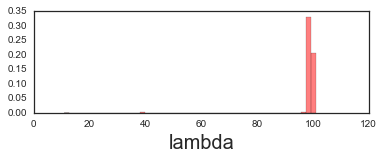

In [207]:
acc_ratio=np.zeros(100)
for z in range(100):


    # given mean of data and lambda and length of data, return log of (likelihood) * (prior) 
    def ln_p(d_mean,lam,len_data):
        return -(1/2)*np.log(lam)+len_data*d_mean*np.log(lam)-len_data*lam



    # length of data
    len_data=len(data)

    # mean of response time
    d_mean = data.mean()[0]

    # total steps of Monte Carlo random walk
    total_steps = 10000

    # store trajectory of random walk for trace plot 
    trace=np.zeros(total_steps)

    # 
    accepted=np.zeros(total_steps)

    # random walk starts from lambda=10 which is a bit off from the maximum likelihood solution
    # but can check convergence well. 
    lam_old= 10
    # store where the random walker was in the beginning
    trace[0]=lam_old

    j=0
    for i in range(total_steps):
        # generate proposal distribution with normal distribution 
        acc = np.random.normal(0,0.7)
        # random walker examines new place
        lam_new=lam_old + acc
        # Calculate log of acceptance ratio
        ln_R = (ln_p(d_mean,lam_new,len_data)-ln_p(d_mean,lam_old,len_data))
        # Decide weather or not to accept the proposal
        if np.log( np.random.rand() ) < ln_R :
            lam_old = lam_new
            accepted[i]+=1

        trace[i]=lam_old
    acc_ratio[z]=accepted.sum()/len(accepted)
print trace.mean()
print accepted.sum()/len(accepted)
plt.subplot(2,1,1)

fig=plt.hist(trace,bins=50,normed = True,color='r',alpha=0.5);
plt.xlabel('lambda',fontsize=20)

mean of lambda is 99.1056035024


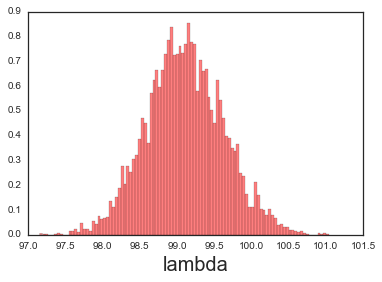

In [208]:
burnin=500
fig=plt.hist(trace[burnin:],bins=100,normed = True,color='r',alpha=0.5);
plt.xlabel('lambda',fontsize=20)
print "mean of lambda is", trace[burnin:].mean()

In [435]:
Age_Score_13=pd.read_csv('./raw-data/13-14Per100Pos_stats.csv')[["Player", "Age", "PTS"]].drop_duplicates('Player')
Age_Score_13['PTS'] = Age_Score_13['PTS'].map(lambda x: Str2float(x))
Age_Score_13 = Age_Score_13[Age_Score_13['PTS'].map(lambda x: type(x) is float)]

In [ ]:
Age_Score_13=pd.read_csv('./raw-data/13-14Per100Pos_stats.csv')[["Player", "Age", "PTS"]].drop_duplicates('Player')
Age_Score_13['PTS'] = Age_Score_13['PTS'].map(lambda x: Str2float(x))
Age_Score_13 = Age_Score_13[Age_Score_13['PTS'].map(lambda x: type(x) is float)]

In [595]:
Age_Games_6=pd.read_csv('./raw-data/5-6Per100Pos_stats.csv')[["Player", "Age", "G"]].drop_duplicates('Player')
Age_Games_7=pd.read_csv('./raw-data/6-7Per100Pos_stats.csv')[["Player", "Age", "G"]].drop_duplicates('Player')
Age_Games_8=pd.read_csv('./raw-data/7-8Per100Pos_stats.csv')[["Player", "Age", "G"]].drop_duplicates('Player')
Age_Games_9=pd.read_csv('./raw-data/8-9Per100Pos_stats.csv')[["Player", "Age", "G"]].drop_duplicates('Player')
Age_Games_10=pd.read_csv('./raw-data/9-10Per100Pos_stats.csv')[["Player", "Age", "G"]].drop_duplicates('Player')
Age_Games_11=pd.read_csv('./raw-data/10-11Per100Pos_stats.csv')[["Player", "Age", "G"]].drop_duplicates('Player')
Age_Games_12=pd.read_csv('./raw-data/11-12Per100Pos_stats.csv')[["Player", "Age", "G"]].drop_duplicates('Player')
Age_Games_13=pd.read_csv('./raw-data/12-13Per100Pos_stats.csv')[["Player", "Age", "G"]].drop_duplicates('Player')
Age_Games_14=pd.read_csv('./raw-data/13-14Per100Pos_stats.csv')[["Player", "Age", "G"]].drop_duplicates('Player')
Age_Games_15=pd.read_csv('./raw-data/14-15Per100Pos_stats.csv')[["Player", "Age", "G"]].drop_duplicates('Player')
Age_Games_16=pd.read_csv('./raw-data/15-16Per100Pos_stats.csv')[["Player", "Age", "G"]].drop_duplicates('Player')

Age_Games_6['G'] = Age_Games_6['G'].map(lambda x: Str2float(x))
Age_Games_6 = Age_Games_6[ Age_Games_6['G'].map(lambda x: type(x) is float)]


Score_all=pd.concat([Age_Games_6,Age_Games_7,Age_Games_8,Age_Games_9,Age_Games_10,Age_Games_11,Age_Games_12,Age_Games_13,Age_Games_14,Age_Games_15,Age_Games_16])
Score_all['G'] = Score_all['G'].map(lambda x: Str2float(x))
Score_all = Score_all[Score_all['G'].map(lambda x: type(x) is float)]

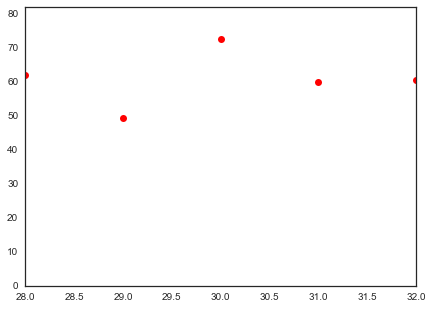

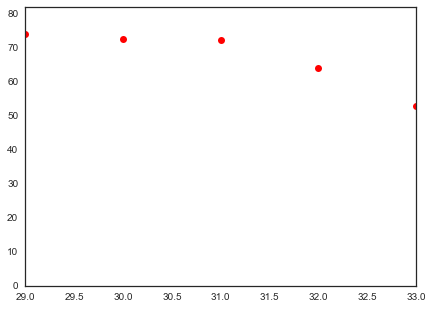

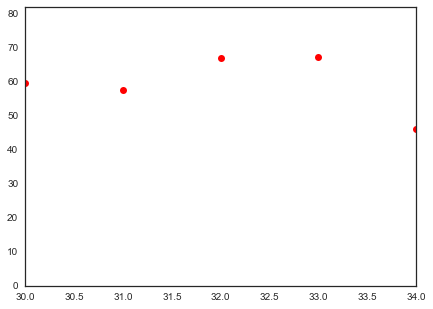

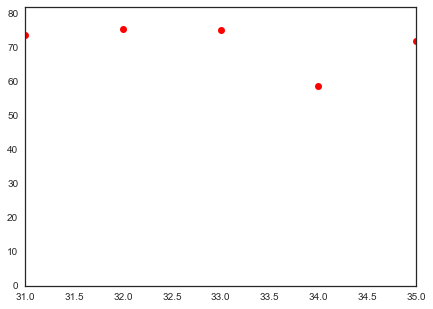

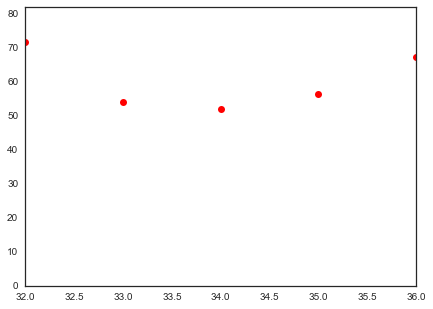

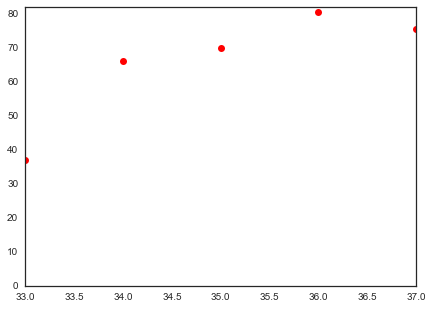

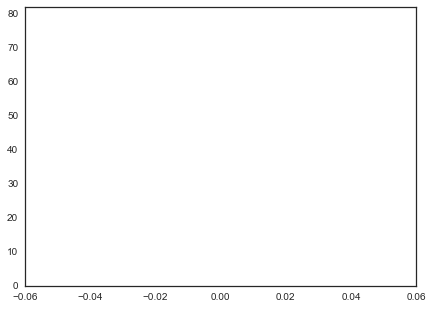

In [602]:
total_years=5
for age in range(28,35):
    Age_Games_6_GbyA=Age_Games_6.groupby(['Age'])
    PlayerList=list( Age_Games_6_GbyA.get_group(str(age))['Player'] )

    SumGame=np.zeros(total_years)
    NumPlayers=0
    plt.figure(figsize=(7, 5)) 
    for i in range(len(PlayerList)): 
        playyears=len(Score_all_GbyP.get_group(PlayerList[i])['G'])
        if playyears>total_years:
            Score_all_GbyP=Score_all.groupby(['Player'])
            SumGame= SumGame + np.array( Score_all_GbyP.get_group(PlayerList[i])['G'] )[:total_years]
            NumPlayers+=1
    plt.plot(np.arange(age,age+total_years),SumGame/NumPlayers,'ro')
    plt.ylim(0,82)

In [560]:
SumGame=np.zeros(10)
NumPlayers=0
for i in range(len(PlayerList)): 
    playyears=len(Score_all_GbyP.get_group(PlayerList[i])['G'])
    if playyears==10:
        Score_all_GbyP=Score_all.groupby(['Player'])
        SumGame= SumGame + np.array( Score_all_GbyP.get_group(PlayerList[i])['G'] )
        NumPlayers+=1

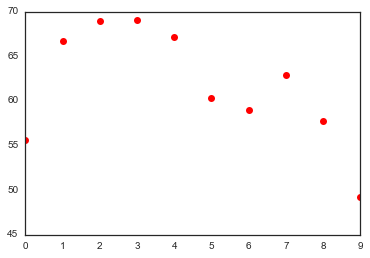

In [561]:
plt.plot(SumGame/NumPlayers,'ro')

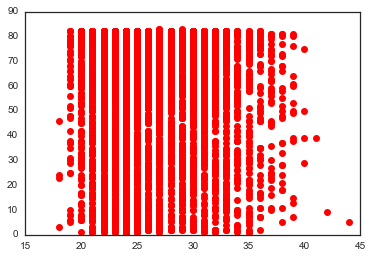

In [590]:
plt.plot(Score_all['Age'], Score_all['G'],'ro')

In [481]:
Games=np.zeros(24)
for i in range(19,43):
    Games[i-19]=Score_all.groupby('Age')['G'].get_group(str(i)).mean()

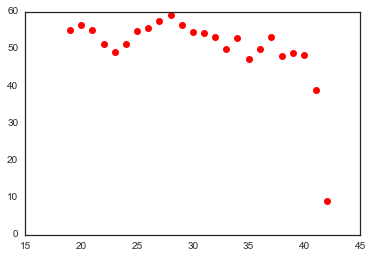

In [484]:
plt.plot(np.arange(19,43),Games,'ro')

In [428]:
Age_Score_12=pd.read_csv('./raw-data/11-12Per100Pos_stats.csv')[["Player", "Age", "PTS\\"]].drop_duplicates('Player')
Age_Score_12['PTS\'] = Age_Score_12['PTS'].map(lambda x: Str2float(x))
Age_Score_12 = Age_Score_12[Age_Score_12['PTS'].map(lambda x: type(x) is float)]

SyntaxError: invalid syntax (<ipython-input-428-f63a11ee4745>, line 2)

In [414]:
Age_Score_13=pd.read_csv('./raw-data/12-13Per100Pos_stats.csv')[["Player", "Age", "PTS"]].drop_duplicates('Player')
Age_Score_13['PTS'] = Age_Score_13['PTS'].map(lambda x: Str2float(x))
Age_Score_13 = Age_Score_13[Age_Score_13['PTS'].map(lambda x: type(x) is float)]

IOError: File ./raw-data/12-13Per100Pos_stats.csv does not exist

In [413]:
Age_Score_14=pd.read_csv('./raw-data/13-14Per100Pos_stats.csv')[["Player", "Age", "PTS"]].drop_duplicates('Player')
Age_Score_14['PTS'] = Age_Score_14['PTS'].map(lambda x: Str2float(x))
Age_Score_14 = Age_Score_14[Age_Score_14['PTS'].map(lambda x: type(x) is float)]

In [411]:
Age_Score_15=pd.read_csv('./raw-data/14-15Per100Pos_stats.csv')[["Player", "Age", "PTS"]].drop_duplicates('Player')
Age_Score_15['PTS'] = Age_Score_15['PTS'].map(lambda x: Str2float(x))
Age_Score_15 = Age_Score_15[Age_Score_15['PTS'].map(lambda x: type(x) is float)]

In [412]:
Age_Score_16=pd.read_csv('./raw-data/15-16Per100Pos_stats.csv')[["Player", "Age", "PTS"]].drop_duplicates('Player')
Age_Score_16['PTS'] = Age_Score_16['PTS'].map(lambda x: Str2float(x))
Age_Score_16 = Age_Score_16[Age_Score_16['PTS'].map(lambda x: type(x) is float)]

In [405]:
Score_all=pd.concat([Age_Score_13, Age_Score_14, Age_Score_15])

In [406]:
Score=np.zeros(11)
for i in range(19,30):
    Score[i-19]=Score_all.groupby('Age')['PTS'].get_group(str(i)).mean()